#### Importing Required Packages

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
# !pip install pycaret
from pycaret.regression import *

#### Importing the data

In [107]:
data=pd.read_csv("data/final_data.csv")
data.head()

,Unnamed: 0,loanIdentifier,origChannel,sellerName,origIntRate,origUPB,origDate,firstPmtDate,origLTV,origCLTV,...,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,fmacRate,fredRate,rateDiff,rateDiffPct,rank
0,5353740,832231376476,3,"GMAC MORTGAGE, LLC",5.875,242000,2007-01-01,2007-03-01,62.0,62.0,...,0.0,0.0,667.0,667.0,667.0,6.18,4.71,-0.305,-0.049353,3.0
1,4612284,877425485629,1,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,4.875,168000,2005-03-01,2005-05-01,39.0,39.0,...,0.0,0.0,797.0,797.0,797.0,5.69,4.38,-0.815,-0.143234,2.0
2,7765258,191286475874,2,OTHER,4.375,556000,2011-11-01,2012-01-01,79.0,79.0,...,0.0,0.0,801.0,747.0,774.0,4.10,2.01,0.275,0.067073,3.0
3,4801103,788814542461,2,"BANK OF AMERICA, N.A.",6.500,112000,2005-08-01,2005-10-01,78.0,78.0,...,0.0,0.0,631.0,631.0,631.0,5.77,4.32,0.730,0.126516,4.0
4,3475269,173368078702,3,"IRWIN MORTGAGE, CORPORATION",5.250,220000,2003-08-01,2003-10-01,73.0,73.0,...,0.0,0.0,767.0,642.0,704.5,6.14,4.44,-0.890,-0.144951,2.0


In [108]:
data.rename(columns={'Unnamed: 0':'namedCol'}, inplace=True )

In [109]:
data.shape

(261615, 26)

In [110]:
# data = data.sample(frac=0.10)

In [111]:
#Checking for missing values
data.isnull().sum()

namedCol            0
loanIdentifier      0
origChannel         0
sellerName          0
origIntRate         0
origUPB             0
origDate            0
firstPmtDate        0
origLTV             0
origCLTV            0
numBorrowers        0
origDebtIncRatio    0
borrCreditScore     0
loanPurp            0
propState           0
zipCode             0
pMIperct            0
mortInsType         0
bestCreditScore     0
worstCreditScore    0
avgCreditScore      0
fmacRate            0
fredRate            0
rateDiff            0
rateDiffPct         0
rank                0
dtype: int64

In [112]:
#Checking datatypes of individual feature
data.dtypes

namedCol              int64
loanIdentifier        int64
origChannel           int64
sellerName           object
origIntRate         float64
origUPB               int64
origDate             object
firstPmtDate         object
origLTV             float64
origCLTV            float64
numBorrowers        float64
origDebtIncRatio    float64
borrCreditScore     float64
loanPurp              int64
propState            object
zipCode               int64
pMIperct            float64
mortInsType         float64
bestCreditScore     float64
worstCreditScore    float64
avgCreditScore      float64
fmacRate            float64
fredRate            float64
rateDiff            float64
rateDiffPct         float64
rank                float64
dtype: object

In [113]:
data['sellerName'] = data['sellerName'].astype('category')
data['propState'] = data['propState'].astype('category')

In [114]:
data['sellerNameCat'] = data['sellerName'].cat.codes
data['stateCat'] = data['propState'].cat.codes

In [115]:
data.dtypes

namedCol               int64
loanIdentifier         int64
origChannel            int64
sellerName          category
origIntRate          float64
origUPB                int64
origDate              object
firstPmtDate          object
origLTV              float64
origCLTV             float64
numBorrowers         float64
origDebtIncRatio     float64
borrCreditScore      float64
loanPurp               int64
propState           category
zipCode                int64
pMIperct             float64
mortInsType          float64
bestCreditScore      float64
worstCreditScore     float64
avgCreditScore       float64
fmacRate             float64
fredRate             float64
rateDiff             float64
rateDiffPct          float64
rank                 float64
sellerNameCat           int8
stateCat                int8
dtype: object

In [116]:
#Dropping features  not required in model building and prediction
data.drop(['origIntRate', 'namedCol', 'loanIdentifier', 'sellerName', 'firstPmtDate', 'propState', 'bestCreditScore', 'avgCreditScore',
          'rank', 'rateDiff', 'borrCreditScore', 'origChannel', 'mortInsType', 'loanPurp', 'pMIperct'],1,inplace=True)

In [117]:
data.head()

,origUPB,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,worstCreditScore,fmacRate,fredRate,rateDiffPct,sellerNameCat,stateCat
0,242000,2007-01-01,62.0,62.0,1.0,42.0,29,667.0,6.18,4.71,-0.049353,32,41
1,168000,2005-03-01,39.0,39.0,1.0,21.0,967,797.0,5.69,4.38,-0.143234,25,12
2,556000,2011-11-01,79.0,79.0,2.0,30.0,946,747.0,4.10,2.01,0.067073,54,4
3,112000,2005-08-01,78.0,78.0,1.0,18.0,184,631.0,5.77,4.32,0.126516,4,39
4,220000,2003-08-01,73.0,73.0,2.0,59.0,274,642.0,6.14,4.44,-0.144951,40,28


### Chi-Square test for Feature Importance of Categorical Features

As majority of the features in the data are categorical, also the target feature is categorical we can use Chi-Square test for to get the feature importance.

In [118]:
def Chi_square(col_1,col_2):
    X=data[col_1].astype('str')
    Y=data[col_2].astype('str')
    observed_values=pd.crosstab(Y,X)
    chi2, p, dof, expected = ss.chi2_contingency(observed_values)
    if(p>0.05):
        print(col_1," is not required")
    else:
        print(col_1," is required")
        
for col in data:
    Chi_square(col,"rateDiffPct")

origUPB  is required
origDate  is required
origLTV  is required
origCLTV  is required
numBorrowers  is not required
origDebtIncRatio  is required
zipCode  is required
worstCreditScore  is required
fmacRate  is required
fredRate  is required
rateDiffPct  is required
sellerNameCat  is required
stateCat  is required


In [119]:
data.head()

,origUPB,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,worstCreditScore,fmacRate,fredRate,rateDiffPct,sellerNameCat,stateCat
0,242000,2007-01-01,62.0,62.0,1.0,42.0,29,667.0,6.18,4.71,-0.049353,32,41
1,168000,2005-03-01,39.0,39.0,1.0,21.0,967,797.0,5.69,4.38,-0.143234,25,12
2,556000,2011-11-01,79.0,79.0,2.0,30.0,946,747.0,4.10,2.01,0.067073,54,4
3,112000,2005-08-01,78.0,78.0,1.0,18.0,184,631.0,5.77,4.32,0.126516,4,39
4,220000,2003-08-01,73.0,73.0,2.0,59.0,274,642.0,6.14,4.44,-0.144951,40,28


In [120]:
data.shape

(261615, 13)

### Model building using Pycaret Library

In [122]:
models=setup(data, target = 'rateDiffPct', categorical_features = ['numBorrowers', 'sellerNameCat', 'zipCode',
                                                                   'stateCat'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3806
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(261615, 13)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [123]:
# 10% sample size, 5 folds, blacklist = ['ransac', 'lr', 'par', 'knn', 'huber', 'svm', 'lasso', 'llar', 'en', 'tr']
model_results=compare_models(fold = 2, blacklist = ['tr'])
model_results

IntProgress(value=0, description='Processing: ', max=67)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:17:49
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 2 of 2
Estimator,. . . . . . . . . . . . . . . . . .,Support Vector Machine
ETC,. . . . . . . . . . . . . . . . . .,2.25 Minutes Remaining


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.0467,3.900000e-03,0.0627,2.595000e-01,0.0479,-0.0925
1,Least Angle Regression,0.0470,4.000000e-03,0.0631,2.484000e-01,0.0484,-0.0925
2,Orthogonal Matching Pursuit,0.0472,4.000000e-03,0.0633,2.447000e-01,0.0482,-0.0968
3,Ridge Regression,0.0475,4.000000e-03,0.0636,2.368000e-01,0.0483,-0.0754
4,Elastic Net,0.0527,5.200000e-03,0.0723,1.330000e-02,0.0576,-0.4629
5,Lasso Regression,0.0530,5.300000e-03,0.0728,-0.000000e+00,0.0578,-0.4655
6,Lasso Least Angle Regression,0.0530,5.300000e-03,0.0728,-0.000000e+00,0.0578,-0.4650
7,Huber Regressor,0.0530,5.300000e-03,0.0730,-5.800000e-03,0.0584,-0.4428
8,Passive Aggressive Regressor,0.0530,5.300000e-03,0.0731,-7.400000e-03,0.0587,-0.4148
9,Linear Regression,65.8352,8.561002e+06,2068.9691,-1.616658e+09,0.3094,-3198.9053


KeyboardInterrupt: 

In [20]:
et = create_model('et', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0003,0.0,0.0019,0.9993,0.0015,0.0008
1,0.0003,0.0,0.0010,0.9998,0.0009,0.0004
2,0.0003,0.0,0.0013,0.9997,0.0010,0.0004
3,0.0005,0.0,0.0033,0.9980,0.0024,0.0005
4,0.0004,0.0,0.0033,0.9981,0.0025,0.0018
Mean,0.0004,0.0,0.0022,0.9990,0.0016,0.0008
SD,0.0001,0.0,0.0010,0.0008,0.0007,0.0005


In [21]:
rf = create_model('rf', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0004,0.0,0.0025,0.9988,0.0019,0.0015
1,0.0004,0.0,0.0016,0.9995,0.0013,0.0021
2,0.0004,0.0,0.0014,0.9996,0.0012,0.0013
3,0.0005,0.0,0.0033,0.9981,0.0024,0.0009
4,0.0005,0.0,0.0034,0.9979,0.0026,0.0026
Mean,0.0004,0.0,0.0024,0.9988,0.0019,0.0017
SD,0.0000,0.0,0.0008,0.0007,0.0005,0.0006


In [22]:
cat = create_model('catboost', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.001,0.0,0.0029,0.9984,0.0023,-0.0025
1,0.001,0.0,0.0030,0.9983,0.0022,0.0032
2,0.001,0.0,0.0023,0.9990,0.0019,0.0065
3,0.001,0.0,0.0039,0.9973,0.0028,-0.0076
4,0.001,0.0,0.0034,0.9979,0.0026,0.0016
Mean,0.001,0.0,0.0031,0.9982,0.0024,0.0002
SD,0.000,0.0,0.0005,0.0006,0.0003,0.0049


In [23]:
lgbm = create_model('lightgbm', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0009,0.0,0.0037,0.9973,0.0029,0.0014
1,0.0008,0.0,0.0025,0.9988,0.0021,0.0036
2,0.0008,0.0,0.0024,0.9989,0.0019,0.0008
3,0.0010,0.0,0.0044,0.9965,0.0032,0.0021
4,0.0009,0.0,0.0029,0.9984,0.0023,0.0023
Mean,0.0009,0.0,0.0032,0.9980,0.0025,0.0020
SD,0.0001,0.0,0.0008,0.0009,0.0005,0.0009


In [24]:
dt = create_model('dt', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0006,0.0,0.0033,0.9979,0.0026,0.0018
1,0.0005,0.0,0.0021,0.9992,0.0017,0.0020
2,0.0006,0.0,0.0027,0.9986,0.0022,0.0015
3,0.0007,0.0,0.0042,0.9968,0.0032,0.0018
4,0.0006,0.0,0.0039,0.9972,0.0030,0.0033
Mean,0.0006,0.0,0.0032,0.9979,0.0026,0.0021
SD,0.0001,0.0,0.0008,0.0009,0.0006,0.0006


In [25]:
gbr = create_model('gbr', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0022,0.0,0.0034,0.9977,0.0031,0.0009
1,0.0023,0.0,0.0034,0.9978,0.0031,0.0088
2,0.0022,0.0,0.0033,0.9980,0.0030,-0.0037
3,0.0023,0.0,0.0038,0.9974,0.0033,-0.0040
4,0.0023,0.0,0.0038,0.9973,0.0033,0.0025
Mean,0.0022,0.0,0.0035,0.9976,0.0032,0.0009
SD,0.0000,0.0,0.0002,0.0003,0.0001,0.0047


In [26]:
xgb = create_model('xgboost', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0023,0.0,0.0035,0.9976,0.0032,-0.0065
1,0.0024,0.0,0.0035,0.9976,0.0033,0.0115
2,0.0024,0.0,0.0036,0.9976,0.0033,-0.0077
3,0.0027,0.0,0.0043,0.9966,0.0038,-0.0077
4,0.0024,0.0,0.0039,0.9972,0.0035,0.0051
Mean,0.0024,0.0,0.0038,0.9973,0.0034,-0.0011
SD,0.0001,0.0,0.0003,0.0004,0.0002,0.0079


In [27]:
blend_specific = blend_models(estimator_list = [et, rf, cat, lgbm, dt, gbr, xgb], fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0008,0.0,0.0022,0.9990,0.0018,-0.0010
1,0.0008,0.0,0.0015,0.9996,0.0013,0.0033
2,0.0008,0.0,0.0016,0.9995,0.0014,-0.0007
3,0.0009,0.0,0.0027,0.9987,0.0020,-0.0010
4,0.0009,0.0,0.0029,0.9985,0.0022,0.0017
Mean,0.0009,0.0,0.0022,0.9991,0.0017,0.0005
SD,0.0000,0.0,0.0006,0.0004,0.0004,0.0018


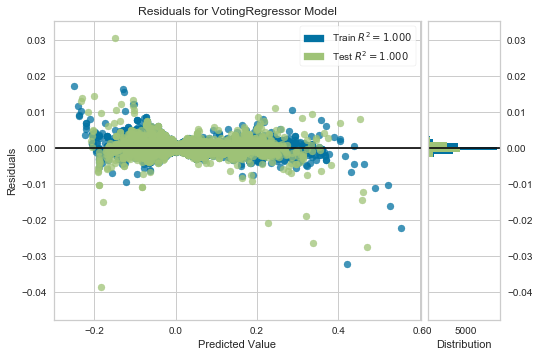

In [31]:
plot_model(blend_specific, plot = 'residuals')

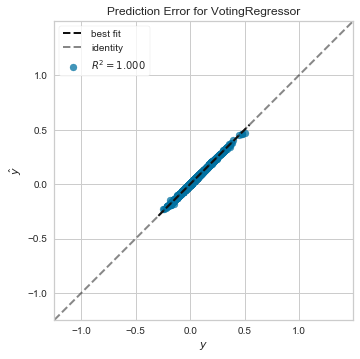

In [34]:
plot_model(blend_specific, plot = 'error')

In [50]:
prediction = predict_model(blend_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0008,0.0,0.0015,0.9995,0.0013,-0.0011
